# SalishSeaCast as a whole plot
based on Ben's code from https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

Text(0.17, 0.7, 'Strait')

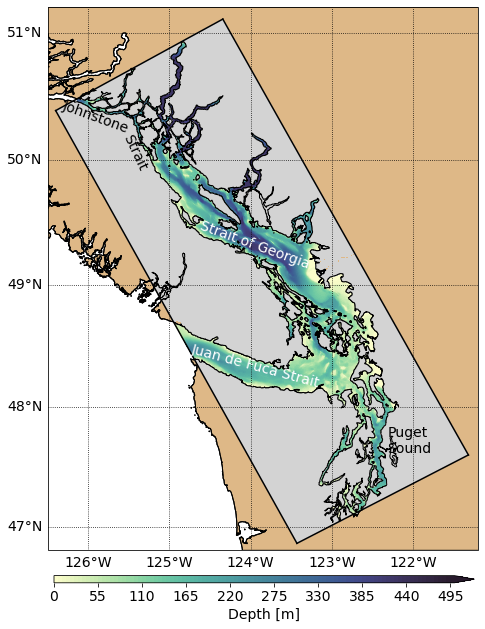

In [15]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset("/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc", mask_and_scale=False)

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Depth
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.Bathymetry, levels=np.arange(0, 500.1, 5),
    cmap=cm.deep, extend='max', transform=crs.PlateCarree(), zorder=1,
)
cax = fig.add_axes([0.15, 0.08, 0.73, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]')

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', facecolor='burlywood', zorder=2))
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', zorder=4))

# Draw box
# x, y = grid['nav_lon'].values, grid['nav_lat'].values
ax.plot(grid['nav_lon'][ :,  0], grid['nav_lat'][ :,  0], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ :, -1], grid['nav_lat'][ :, -1], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][ 0,  :], grid['nav_lat'][ 0,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.plot(grid['nav_lon'][-1,  :], grid['nav_lat'][-1,  :], 'k-', zorder=6, transform=crs.PlateCarree())
ax.contourf(grid['nav_lon'],  grid['nav_lat'], grid['Bathymetry'], [-0.01, 0.01], colors='lightgray', zorder=3, transform=crs.PlateCarree())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs, zorder=8)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# # Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', weight= "bold",c='w', transform=ax.transAxes, zorder=7)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes, zorder=7)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', c='w',transform=ax.transAxes, rotation=-15,zorder = 7)
ax.text(0.35, 0.52, 'Strait of Georgia', c='w',transform=ax.transAxes, rotation=-20, zorder=7)
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20, zorder=7)
ax.text(0.17, 0.70, 'Strait',transform=ax.transAxes, rotation=-65, zorder=7)